# Project Title: Analyzing Customer Satisfaction Trends

**Author:** David Rodriguez-Mayorquin

**Date:** February 8, 2024

**Purpose:**
The purpose of this project is to analyze trends in customer satisfaction based on survey data collected over the past year. By examining factors such as product quality, customer service, and overall experience, we aim to identify areas for improvement and develop strategies to enhance customer satisfaction levels.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy

In [49]:
## Data Acquisition
# Load the flights dataset into DataFrame
df = sns.load_dataset('flights')

# Inspect first rows of the DataFrame
print(df.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [12]:
## Initial Data Inspection
# Display the 10 first rows of the dataframe flights
print(df.head(10))
print(df.shape)
print(df.dtypes)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148
7  1949   Aug         148
8  1949   Sep         136
9  1949   Oct         119
(144, 3)
year             int64
month         category
passengers       int64
dtype: object


In [18]:
## Descriptive Statistics
#Descriptive statistics for passengers column

print(df['passengers'].describe())


count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64


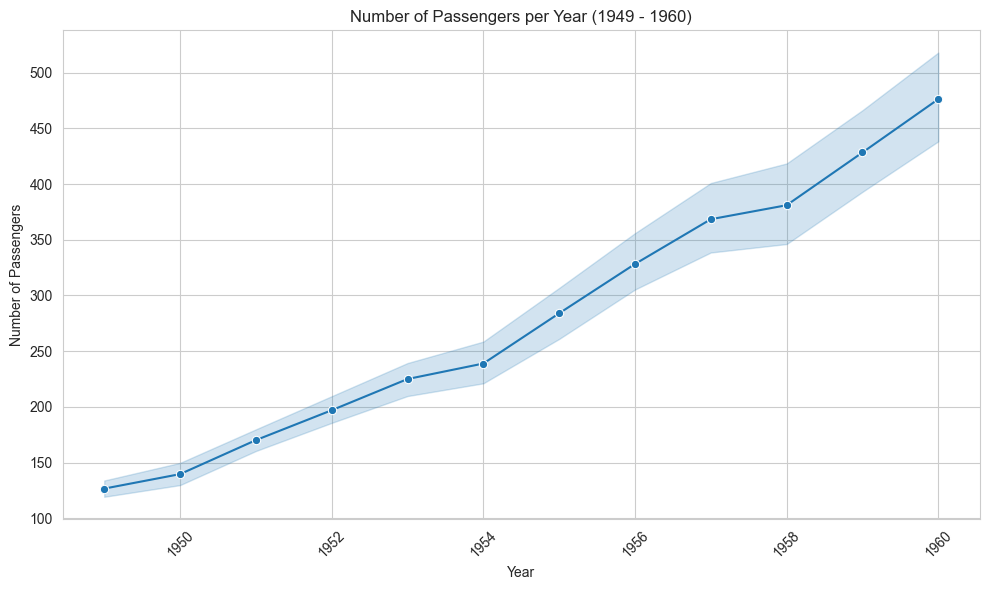

In [21]:
## Data Distribution for passengers column

# Set the style of the plot
sns.set_style("whitegrid")

# Filter data for the years 1949 to 1960
df_filtered = df[df['year'].between(1949, 1960)]

# Create a line plot with years on the x-axis and passengers on the y-axis
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='year', y='passengers', marker='o')
plt.title('Number of Passengers per Year (1949 - 1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



## Visualization: Number of Passengers per Year (1949 - 1960)

This line plot visualizes the number of passengers per year from 1949 to 1960. Each point on the line represents the number of passengers for a specific year.

The x-axis represents the years from 1949 to 1960, while the y-axis represents the number of passengers. Each point on the line plot corresponds to the number of passengers for a specific year.

The line plot allows us to observe that over the years there's an increase of passengers.

This visualization provides a clear and concise representation of how the number of passengers varied over the years 1949 to 1960.


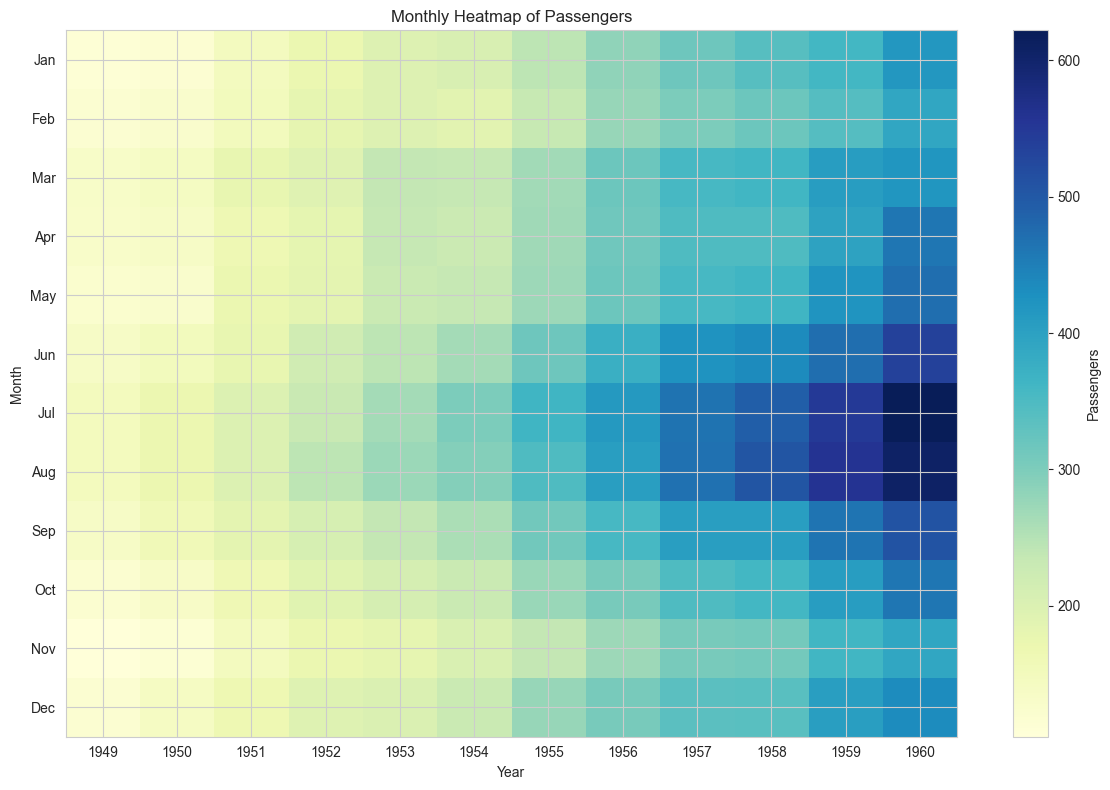

In [60]:
## Data distribution for number of passengers accross months and years

# Assuming df contains the DataFrame with columns 'year', 'month', and 'passengers'
# Assuming df is already sorted by 'year' and 'month'

# Pivot the DataFrame to have months as rows and years as columns
pivot_df = df.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum', observed=False)

# Create a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(pivot_df, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Passengers')
plt.title('Monthly Heatmap of Passengers')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(range(len(pivot_df.columns)), pivot_df.columns)
plt.yticks(range(len(pivot_df.index)), pivot_df.index)
plt.tight_layout()
plt.show()


## Visualization: Monthly heatmap with passengers counts across different month and years

Each cell in the heatmap represents the total number of passengers for a specific month and year combination. The intensity of the color in each cell indicates the magnitude of passenger counts, with darker shades representing higher passenger numbers. We can see the max of passengers it is 622 in July 1960 and the min is 104 in November 1949

Color Intensity: Darker shades of color indicate months with higher passenger counts, while lighter shades represent months with lower passenger counts.

Trends Over Time: By observing the heatmap, we can identify patterns and trends in passenger travel over the 12-year period from January 1949 to December 1960. For example, we can look for seasonal variations in passenger counts, such as peaks during holiday seasons or troughs during off-peak months.

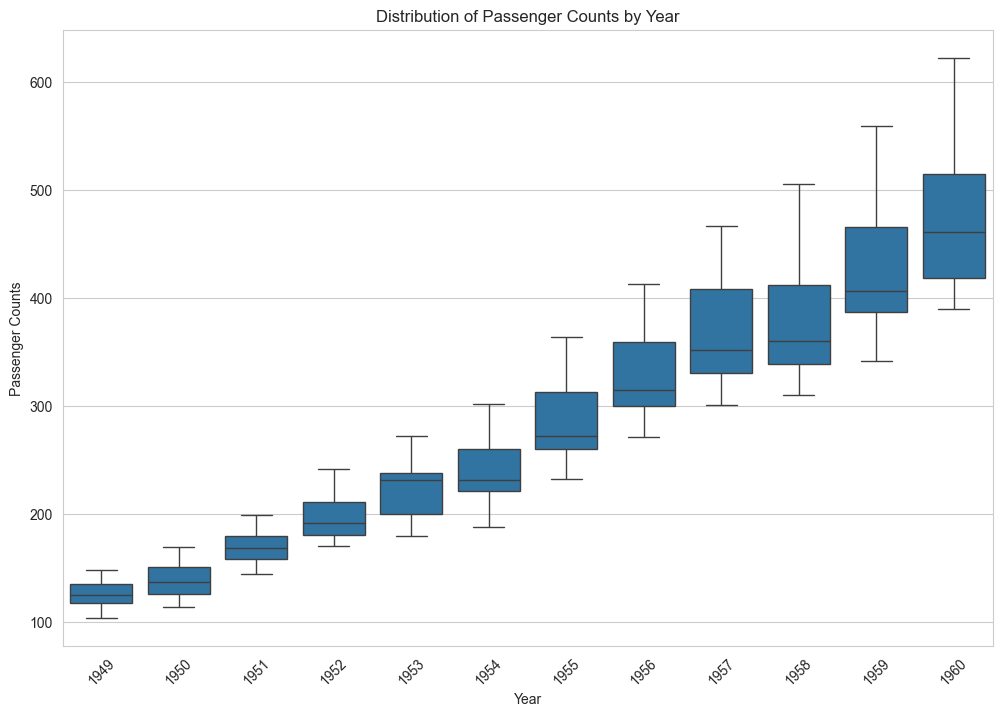

In [61]:
## Data distribution of passenger counts for each year in the dataset

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a boxplot of passenger counts by year
sns.boxplot(x='year', y='passengers', data=df)

# Set the title and labels
plt.title('Distribution of Passenger Counts by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Counts')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Visualization boxplot showing the distribution of passenger counts for each year in the dataset

The line inside each box represents the median value of passenger counts for the respective year. It indicates the central tendency of the data distribution

The spread of the boxplot provides insight into the variability of passenger counts for each year. A wider box indicates greater variability, while a narrower box suggests less variability.

The boxplot provides a concise summary of the distribution of passenger counts for each year, making it easy to compare the distribution across multiple years visually.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df contains the DataFrame with columns 'year', 'month', and 'passengers'
# Assuming df is already sorted by 'year' and 'month'

# Convert 'month' column to strings
df['month'] = df['month'].astype(str)

# Combine 'year' and 'month' columns into a single datetime column
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%B')
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['passengers'], model='additive')

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'